# Setup & Imports

In [ ]:
import sys
import os
import pandas as pd

# Add the parent directory to sys.path to enable importing from 'src'
sys.path.append(os.path.abspath(os.path.join('..')))

from src import data_loader, visualization, clustering

# Display settings
pd.set_option('display.max_columns', None)

# Part 1: DATA EXPLORATION AND PREPROCESSING

## 1.1 Load the Data

In [2]:
# Define path to dataset
file_path = '../data/raw/Mall_Customers.csv'

# Load the data using module
df = data_loader.load_data(file_path)

Data successfully loaded from ../data/raw/Mall_Customers.csv


## 1.2 Initial Exploration:

In [3]:
# Display first 10 rows as requested
display(df.head(10))

# Perform inspection (Shape, Dtypes, Nulls, Duplicates)
data_loader.inspect_data(df)

,CustomerID,gender,age,yearly income,pruchase spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


--- Data Inspection ---
Shape: (200, 5) (Rows, Columns)

Data Types:
CustomerID            int64
gender               object
age                   int64
yearly income         int64
pruchase spending     int64
dtype: object

Missing Values:
CustomerID           0
gender               0
age                  0
yearly income        0
pruchase spending    0
dtype: int64

Duplicate Rows: 0
No duplicates found.


## 1.3 Data Cleaning

In [4]:
# Drop CustomerID
df_clean = data_loader.preprocess_data(df)

# Verify the drop
print(f"New Shape: {df_clean.shape}")
display(df_clean.head(5))

# Define path for processed data
processed_file_path = '../data/processed/Mall_Customers_Clean.csv'

# Save the cleaned data
data_loader.save_data(df_clean, processed_file_path)

Dropped 'CustomerID' column.
New Shape: (200, 4)


,gender,age,yearly income,purchase spending
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Data saved to ../data/processed/Mall_Customers_Clean.csv


# Part 2: GRAPHICAL DATA REPRESENTATION

## 2.1 Univariate Analysis

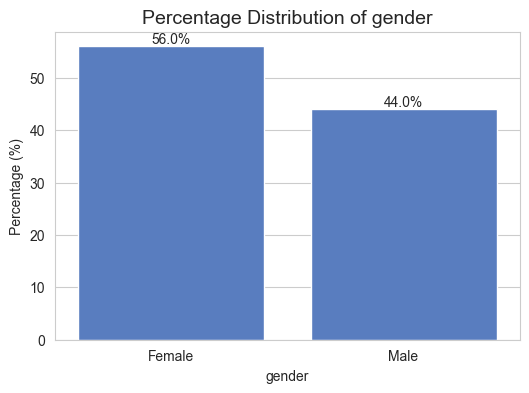

In [5]:
# 1. Gender Distribution (Percentage)
visualization.plot_gender_distribution(df_clean, 'gender')

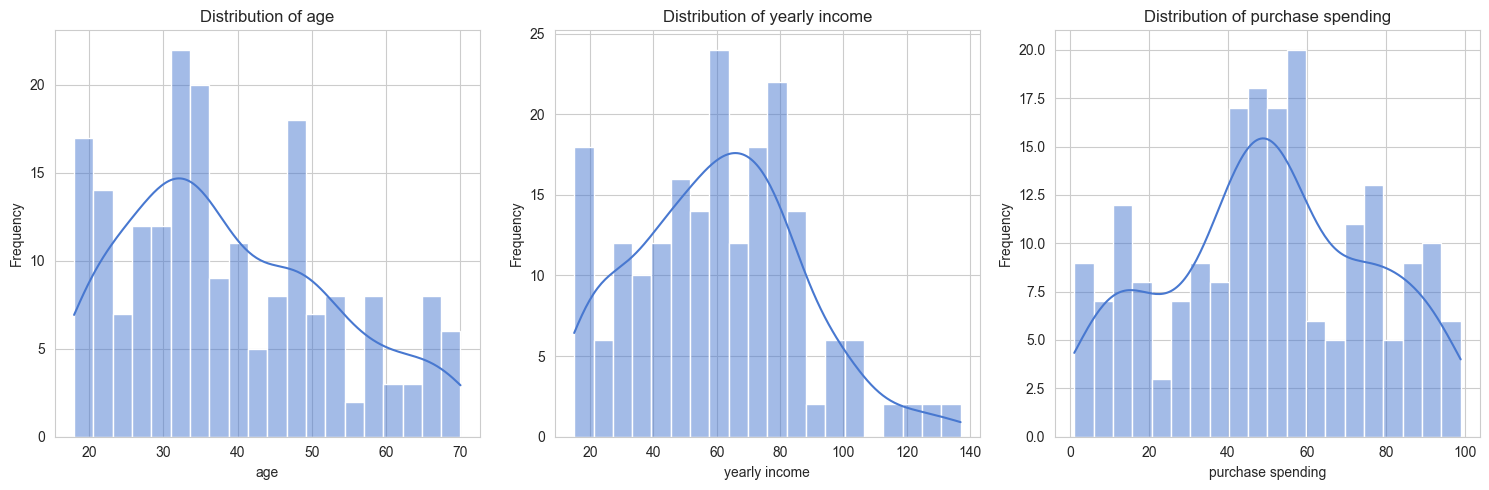

In [6]:
# 2. Histograms for Numerical Features
numerical_cols = ['age', 'yearly income', 'purchase spending']
visualization.plot_histograms(df_clean, numerical_cols)

## 2.2 Bivariate Analysis

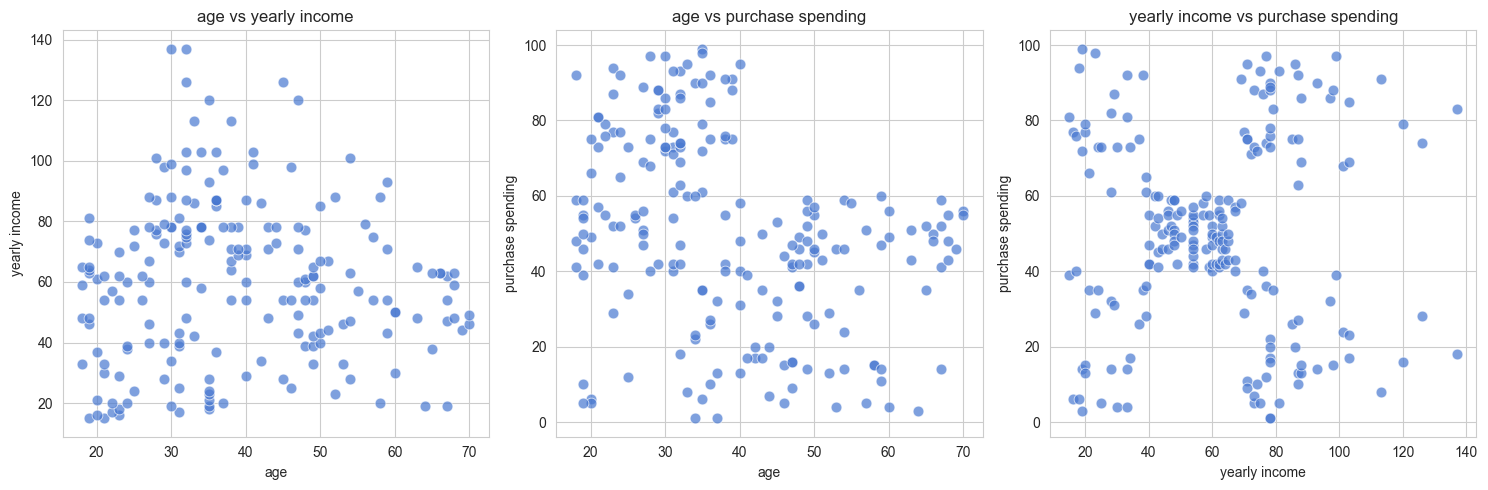

In [7]:
# Define the pairs for bivariate scatter plots
pairs = [
    ('age', 'yearly income'),
    ('age', 'purchase spending'),
    ('yearly income', 'purchase spending')
]

visualization.plot_bivariate_scatter(df_clean, pairs)

### *Question*: Based on the Yearly Income vs. purchase spending scatter plot, how many natural groups or clusters do you visually identify?

Looking at the third scatter plot (Income vs Spending), I can visually identify 5 distinct groups:
1. Low Income, Low Spending (Bottom Left)
2. Low Income, High Spending (Top Left)
3. Moderate Income, Moderate Spending (Center)
4. High Income, Low Spending (Bottom Right)
5. High Income, High Spending (Top Right)

## 3.2 Multivariate Analysis

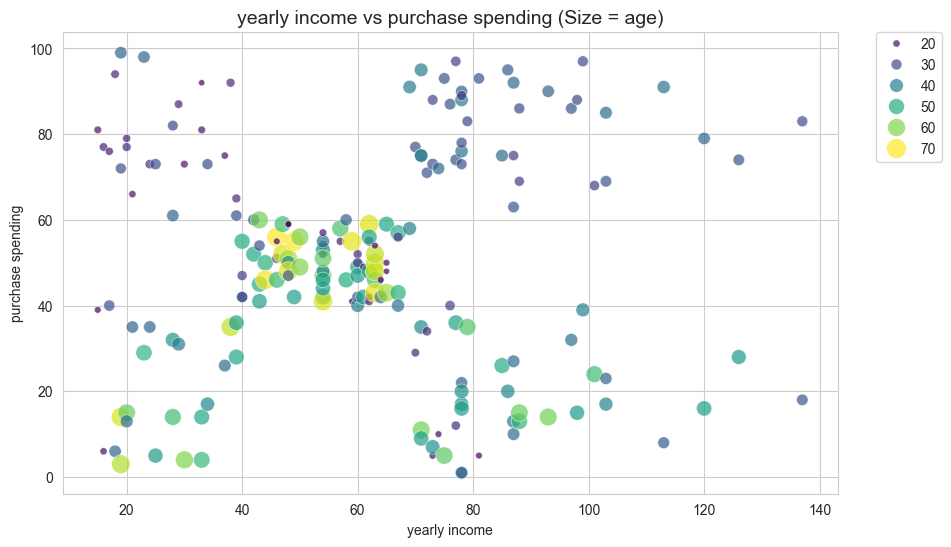

In [8]:
visualization.plot_multivariate_bubble(
    df_clean, 
    x_col='yearly income', 
    y_col='purchase spending', 
    size_col='age'
)

# Part 3:  K-MEANS CLUSTERING ON 2-FEATURE COMBINATIONS

## 3.1 Clustering based on Age and purchase spending

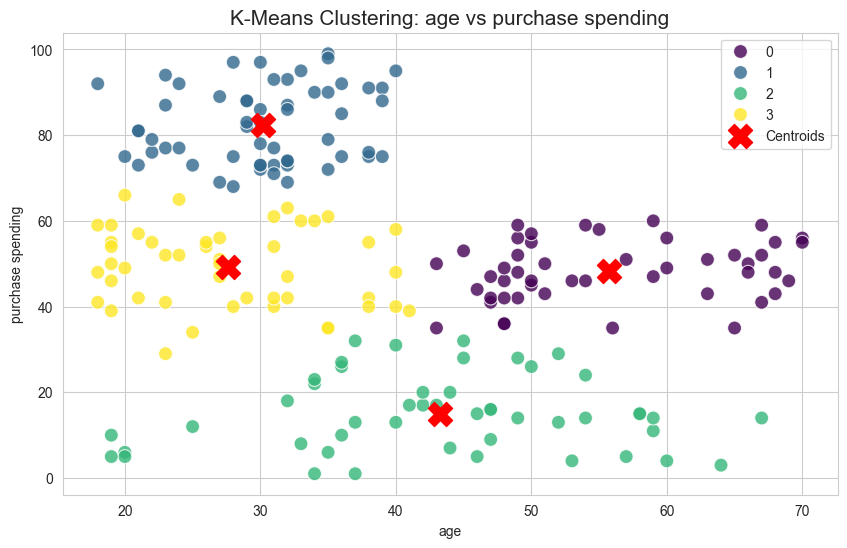

In [9]:

X1 = df_clean[['age', 'purchase spending']]

labels_1, centroids_1 = clustering.fit_kmeans(X1, n_clusters=4)

visualization.plot_kmeans_clusters(
    df_clean, 
    x_col='age', 
    y_col='purchase spending', 
    labels=labels_1, 
    centroids=centroids_1
)


### **Question**: Briefly describe the four customer groups identified in this step.

- Cluster 0 (puprle): Middle-aged to Older customers (Age > 40) with Average Spending.
- Cluster 1 (blue): Young customers (Age < 40) with High Spending.
- Cluster 2 (green): All ages with Low Spending.
- Cluster 3 (yellow): Young to Middle-aged customers (Age < 45) with Average Spending.

## 3.2 Clustering based on Yearly Income and purchase spending

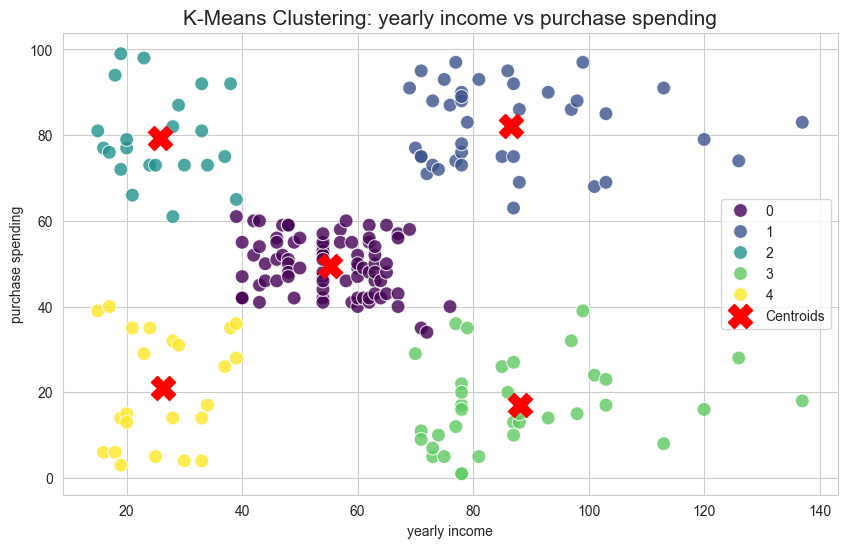

In [10]:
X2 = df_clean[['yearly income', 'purchase spending']]

labels_2, centroids_2 = clustering.fit_kmeans(X2, n_clusters=5)

visualization.plot_kmeans_clusters(
    df_clean, 
    x_col='yearly income', 
    y_col='purchase spending', 
    labels=labels_2, 
    centroids=centroids_2
)

### **Question**: These five clusters are often considered the most valuable for marketing. Give each of the five clusters a descriptive name (e.g., "High Income, Low Spenders").

- Cluster 0 (purple): Moderate Income, Moderate Spenders.
- Cluster 1 (cyan): High Income, High Spenders.
- Cluster 2 (blue): Low Income, High Spenders.
- Cluster 3 (green): High Income, Low Spenders
- Cluster 4 (yellow): Low Income, Low Spenders.

# Part 4: COMPREHENSIVE K-MEANS CLUSTERING ON 3 FEATURES

## 4.1 Data Preperation and Scaling

In [11]:
features_3d = ['age', 'yearly income', 'purchase spending']

df_scaled = data_loader.scale_features(df_clean, features_3d)

display(df_scaled.head())

,age,yearly income,purchase spending
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


## 4.2 Find the Optimal Number of Clusters (K)

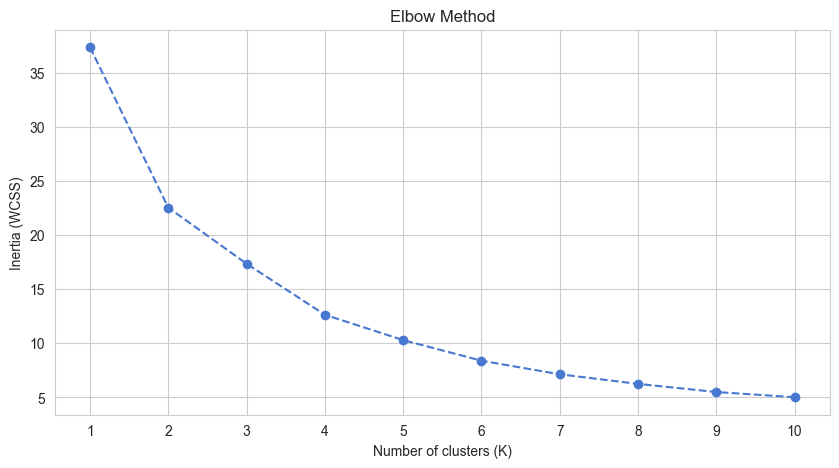

In [12]:
inertia_values = clustering.get_inertia_values(df_scaled, max_k=10)

visualization.plot_elbow_curve(inertia_values)

### **Question**: Identify the "elbow" point. What is the optimal value for K?

- Rapid Drop (K=1 to K=4): The inertia drops very steeply, meaning adding clusters is giving us a lot of new information.
- The "Bend" (K=4 to K=6): The curve starts to shallow out. While there is still a gain in performance (inertia goes down) between 4 and 6, it is less dramatic than the start.
- The Flattening (K=6 onwards): After K=6, the line becomes almost linear and flat. The drop from 6 to 7 or 7 to 8 is minimal. This indicates that adding more clusters beyond 6 is resulting in "diminishing returns" (we are just overfitting the data rather than finding real groups).

Thus **Optimal Value for k is 6**

## 4.3 Apply K-Means Algorithm

In [13]:
optimal_k = 6
labels_3d, centers_3d = clustering.fit_kmeans(df_scaled, n_clusters=optimal_k)

# Add labels to the ORIGINAL dataframe for interpretation
df_clean['cluster_3d'] = labels_3d

## 4.4 Visualize the Final Clusters 3D

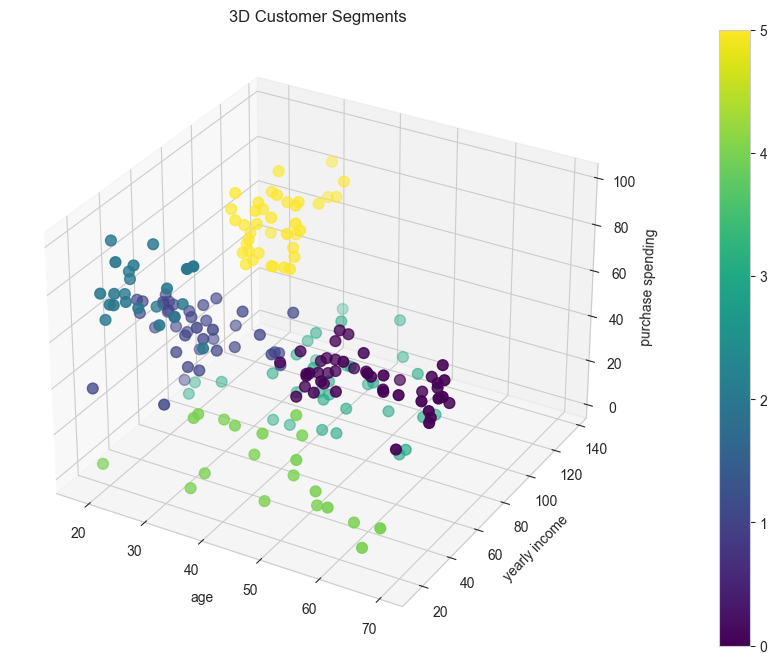

In [14]:
visualization.plot_3d_static(
    df_clean, 
    x_col='age', 
    y_col='yearly income', 
    z_col='purchase spending', 
    labels=labels_3d
)

# Part 5: FINAL ANALYSIS AND RECOMMENDATIONS

Note: I am going to make the interactive plot first then interpret the results because it is easier to understand thee clusters with interactivity

## 5.1 Create an Interactive 3D Scatter Plot

In [15]:
visualization.plot_3d_interactive(
    df_clean,
    x_col='age',
    y_col='yearly income',
    z_col='purchase spending',
    color_col='cluster_3d'
)

## 5.2 Interpret the 3D Segments

### **Question**: Based on your 3D scatter plot, describe each of the customer segments you have identified. How do they compare to the 2D segments from Part 3?

- Cluster 0 (dark blue): middle-aged to old moderate income, moderate spenders
- Cluster 1 (purple): young moderate income, moderate spenders
- Cluster 2 (magenta): young low income, low spenders
- Cluster 3 (red): high income, low spenders
- Cluster 4 (orange): low income, high spenders
- Cluster 5 (yellow): young to middle-aged high income high spenders

**Comparison**: Compared to the 2D segments (Income vs Spending), adding Age helped us split the "Standard Customers" into younger and older groups, providing more targeted demographics. in addition to giving more information about the age of the high income, high spenders and low income, low spenders groups. this will help target them more acurately 

## 5.3 Strategic Recommendations

### **Question**: If you were a marketing manager for the mall, what is one specific marketing strategy you would suggest for two of the final clusters you identified? Explain your reasoning.

- Strategy for High Income, High Spenders, Young: Promote trendy luxury brands, tech gadgets, and fancy items (watches, ...). They have the money and the desire to spend, and their age suggests they are influenced by trends and social status.
- Strategy for High Income, Low Spenders: Offer "exclusive" membership rewards or "Buy One Get One" deals on practical high-end goods (home decor, appliances). They have the money but are hesitant to part with it. Value-based propositions or loyalty programs might help get to their desires.

# Part 6: HIERARCHICAL CLUSTERING

## 6.1 Create and Analyze the Dendrogram

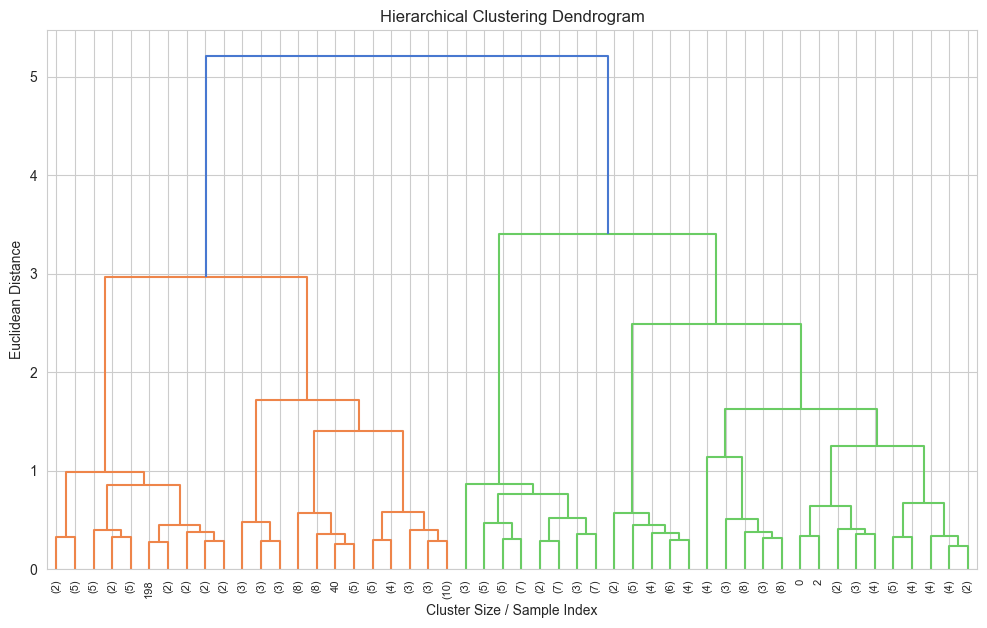

In [16]:
linkage_matrix = clustering.get_linkage_matrix(df_scaled, method='ward')

visualization.plot_dendrogram(linkage_matrix)

### **Question** Observe the dendrogram. The y-axis represents the distance between clusters. To find the optimal number of clusters, look for the longest vertical line that does not cross any horizontal lines (merges). By "cutting" the dendrogram at this point, how many clusters would you suggest? Does this number match what you found with the Elbow Method in Part 4?

By cutting the dendrogram at an Euclidean distance of 2.0 (where the vertical lines are longest and most stable), we identify 5 distinct clusters. While the Elbow Method in Part 4 showed a bend around K=6

## 6.2 Perform Hierarchical Clustering

In [17]:
#  Use K=5 based on dendrogram
labels_hc = clustering.perform_hierarchical_clustering(df_scaled, n_clusters=5)

# Add labels to dataframe
df_clean['Cluster_HC'] = labels_hc


## 6.3 Visualize the Hierarchical Clusters

In [18]:
visualization.plot_3d_interactive(
    df_clean,
    x_col='age',
    y_col='yearly income',
    z_col='purchase spending',
    color_col='Cluster_HC'
)

### **Question**: Compare the 3D scatter plot from your Hierarchical Clustering with the one from K-Means. Are the resulting clusters similar or different? In your opinion, which method provided a more intuitive or useful segmentation for this dataset, and why? Explain your reasoning by referring to your plots.

Visually, the 3D scatter plots from both algorithms produce highly similar results.

- The "Corner" Clusters: Both K-Means and Hierarchical Clustering successfully identified the four distinct corner groups: High Income/High Spend, High Income/Low Spend, Low Income/High Spend, and Low Income/Low Spend. These groups are naturally well-separated in the vector space, so both distance-based algorithms detect them easily.
- The "Middle" Cluster: The main difference lies in the central cluster (Moderate Income/Moderate Spend). K-Means, which minimizes variance from a center point, tends to force this group into a spherical shape. Hierarchical clustering, which relies on point-to-point linkage, might include or exclude borderline points differently, leading to slightly different cluster boundaries for customers who don't fit perfectly into a "stereotype."

For this specific dataset (small size, n=200), Hierarchical Clustering provided a more intuitive segmentation process.

- Reasoning - The "K" Problem: The biggest challenge in K-Means is selecting K. In Part 4, the Elbow Method produced a smooth curve where the "elbow" was ambiguous (it could have been 5 or 6). This required a subjective guess.
- Reasoning - The Dendrogram Solution: In contrast, the Dendrogram in Part 6 provided a clear, deterministic visualization. By observing the longest vertical lines between Euclidean distance 1.7 and 2.5, the Dendrogram definitively suggested K=5 as the most stable configuration. It removed the ambiguity.

While Hierarchical Clustering was better for the exploratory phase to determine the optimal number of clusters (K=5), K-Means remains the superior choice for deployment. If the mall had 1 million customers, Hierarchical clustering would be computationally too expensive ($O(n^2)$ complexity), whereas K-Means scales linearly in respect to n.

## 6.4 Running k-means with k=5

In [19]:
labels_3d_latest, centers_3d_latest = clustering.fit_kmeans(df_scaled, n_clusters=5)

# Add labels to the ORIGINAL dataframe for interpretation
df_clean['cluster_3d_latest'] = labels_3d_latest

visualization.plot_3d_interactive(
    df_clean,
    x_col='age',
    y_col='yearly income',
    z_col='purchase spending',
    color_col='cluster_3d_latest'
)